# 2) Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x=data["YearsExperience"]
y=data["Salary"]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


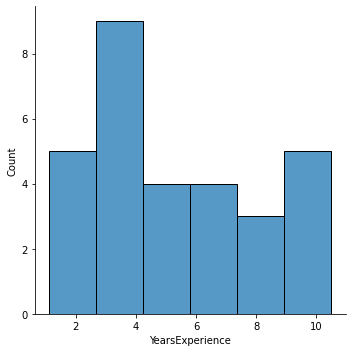

In [7]:
import seaborn as sns
sns.displot(data["YearsExperience"])

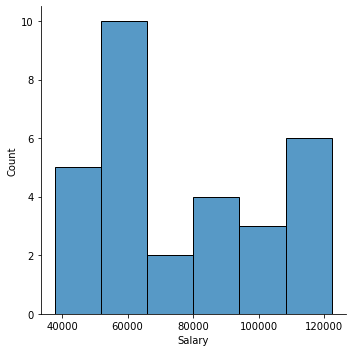

In [8]:
import seaborn as sns
sns.displot(data["Salary"])

In [9]:
import statsmodels.formula.api as smf
model=smf.ols("np.log(x) ~ np.log(y)",data=data).fit()

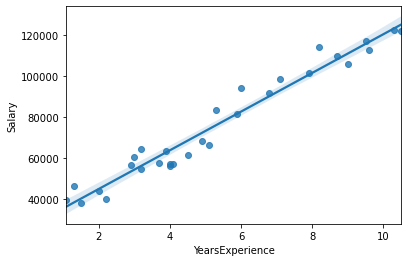

In [10]:
sns.regplot(x='YearsExperience',y='Salary',data=data);

In [11]:
model.params

Intercept   -16.490132
np.log(y)     1.610448
dtype: float64

In [12]:
print(model.rsquared,model.rsquared_adj)

0.9052150725817147 0.9018298966024902


In [13]:
newdata=pd.Series([0.9052150725817147,0.9018298966024902])

In [14]:
data_pred=pd.DataFrame(newdata,columns=['y'])

In [15]:
model.predict(data_pred)

0   -16.650504
1   -16.656538
dtype: float64

# or it may be solve by another method

## Solve by using Linear Regression

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data=pd.read_csv("Salary_Data.csv")

In [18]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [20]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [21]:
x=data['YearsExperience']
y=data['Salary']

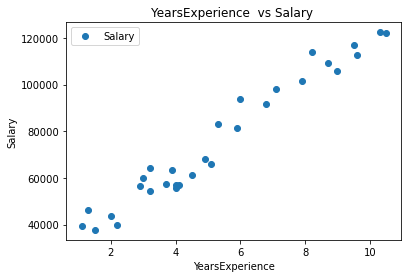

In [22]:
data.plot(x='YearsExperience', y='Salary', style='o')
plt.title('YearsExperience  vs Salary ')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [23]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
print(regressor.intercept_)

26780.099150628186


In [27]:
print(regressor.coef_)

[9312.57512673]


In [28]:
y_pred= regressor.predict(X_test)

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [30]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2446.1723690465064
Mean Squared Error: 12823412.298126562
Root Mean Squared Error: 3580.979237321345
